In [19]:
from setuptools.command.bdist_egg import safety_flags
!export HF_HUB_OFFLINE=1
!export HF_HUB_DISABLE_TELEMETRY=1

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)


In [21]:
from diffusers import StableDiffusionImg2ImgPipeline
import torch

pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    "stablediffusionapi/realistic-vision-v51",
    torch_dtype=torch.float16,
    local_files_only=True,
    safety_checker=None,
).to("cuda")


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_img2img.StableDiffusionImg2ImgPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [73]:
from PIL import Image


image = Image.open("sample_1.png").convert("RGB")
image = image.resize((512, 512))


  0%|          | 0/37 [00:00<?, ?it/s]

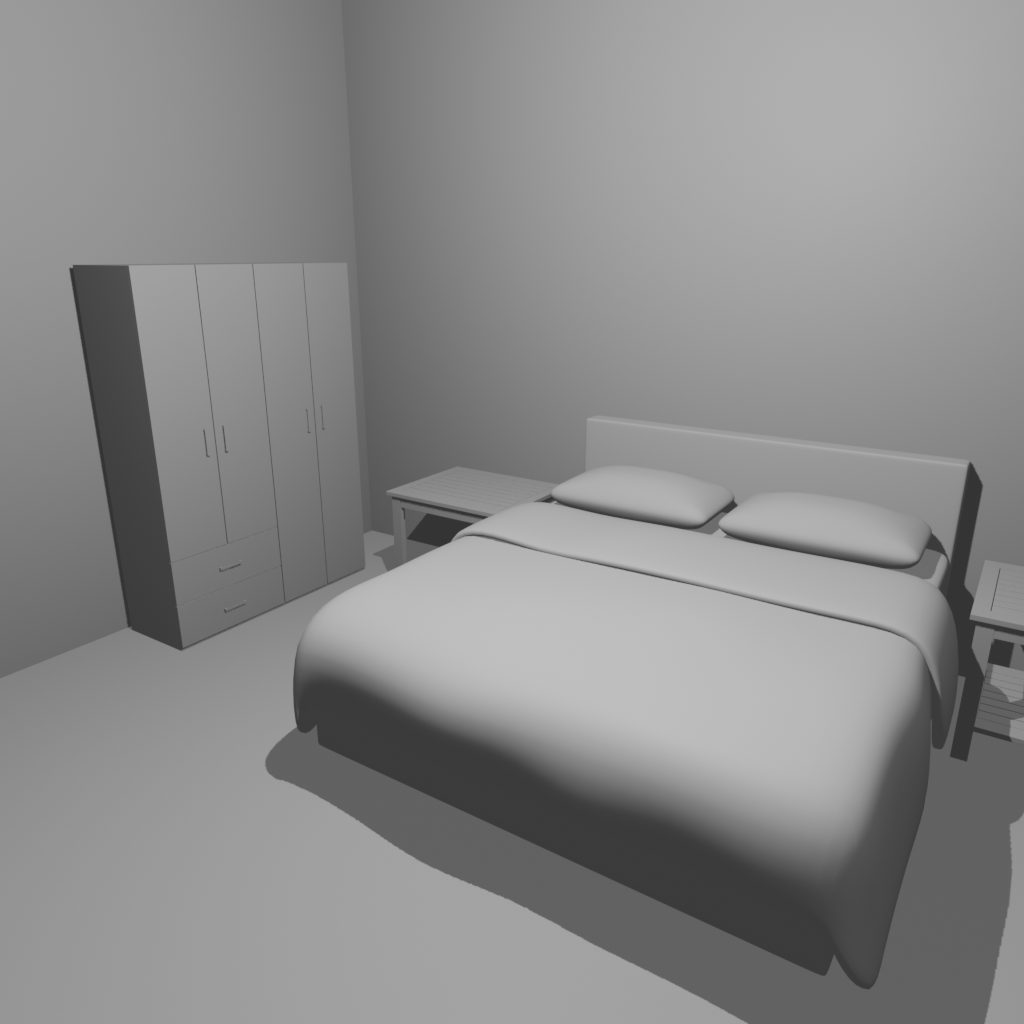

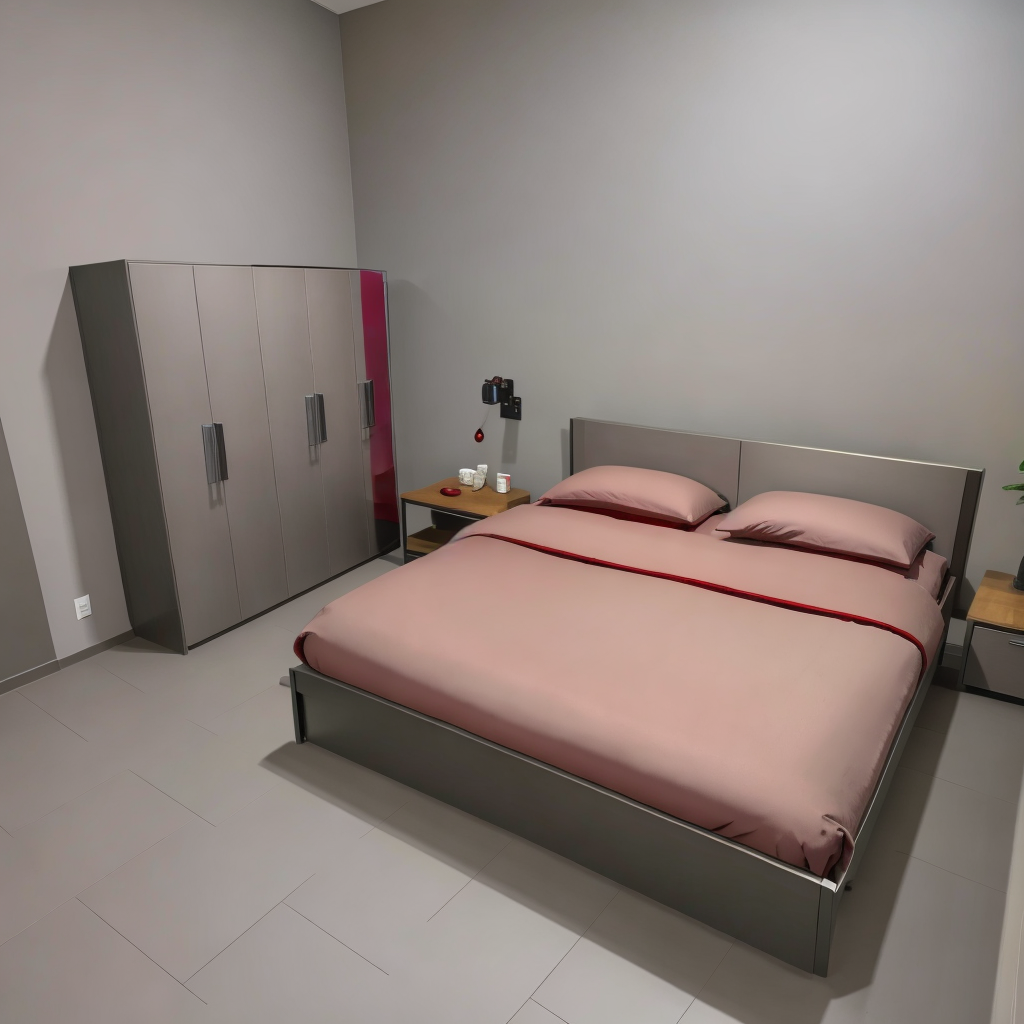

  0%|          | 0/37 [00:00<?, ?it/s]

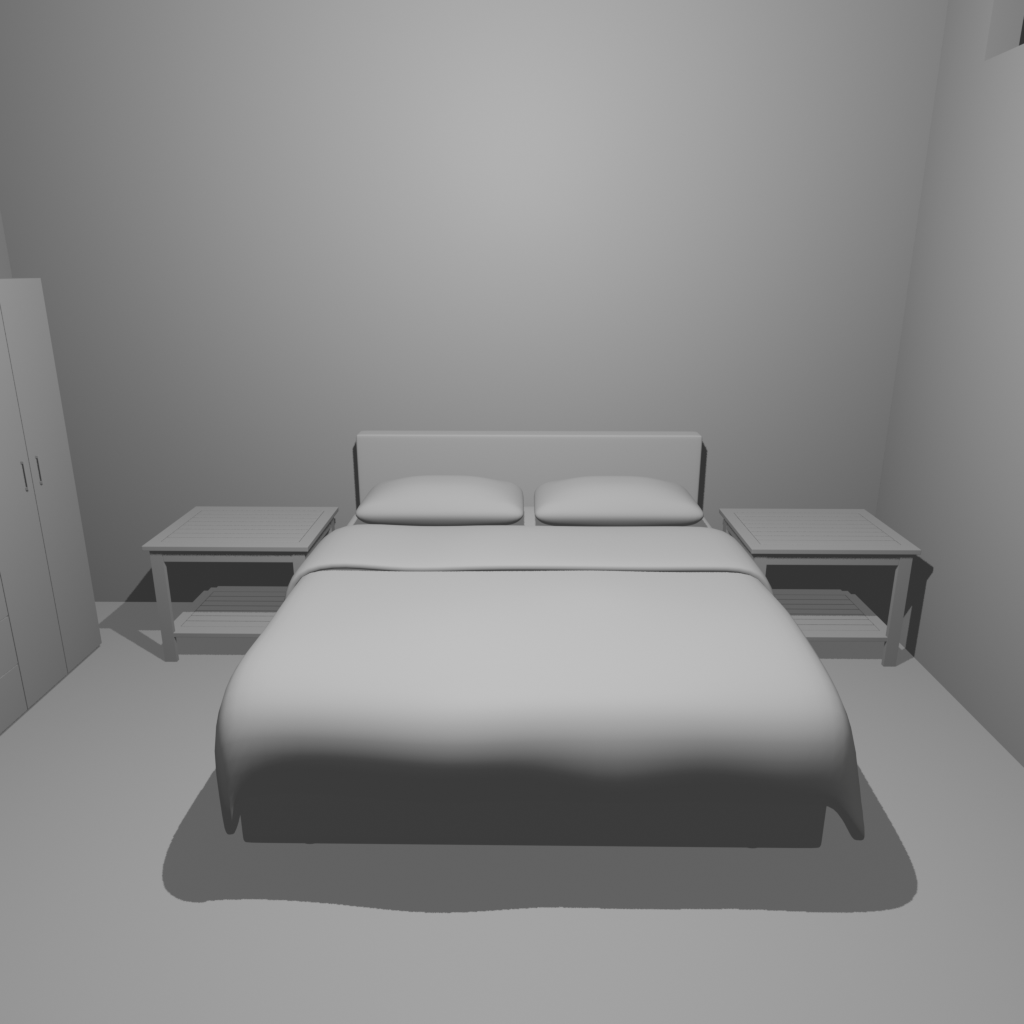

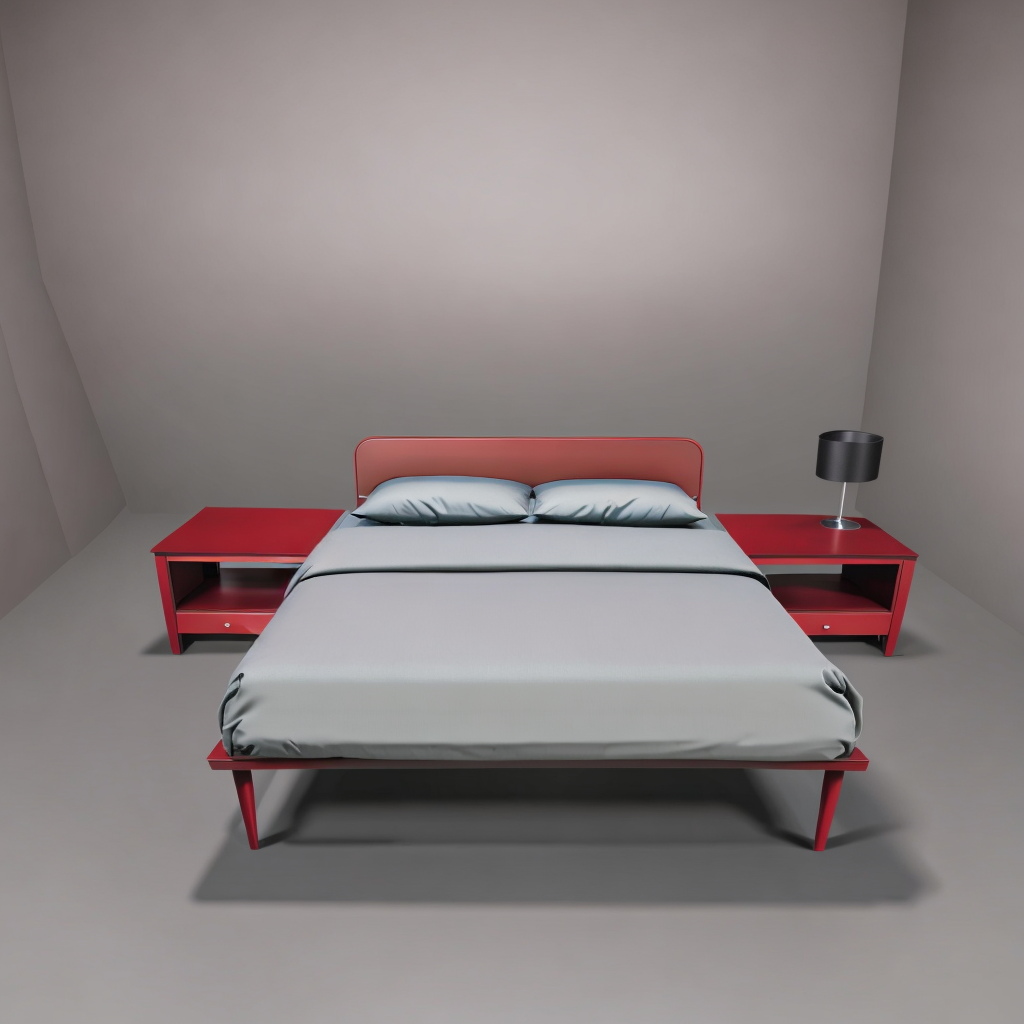

  0%|          | 0/37 [00:00<?, ?it/s]

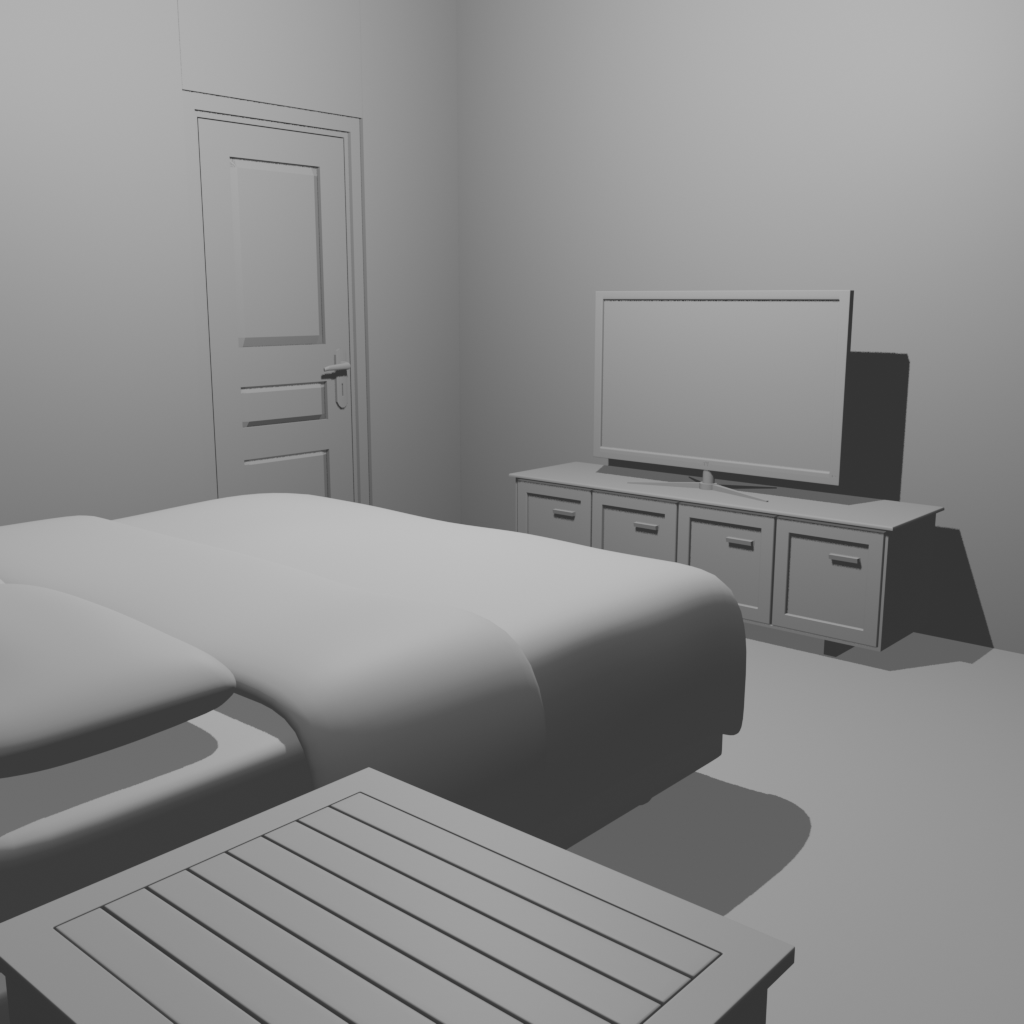

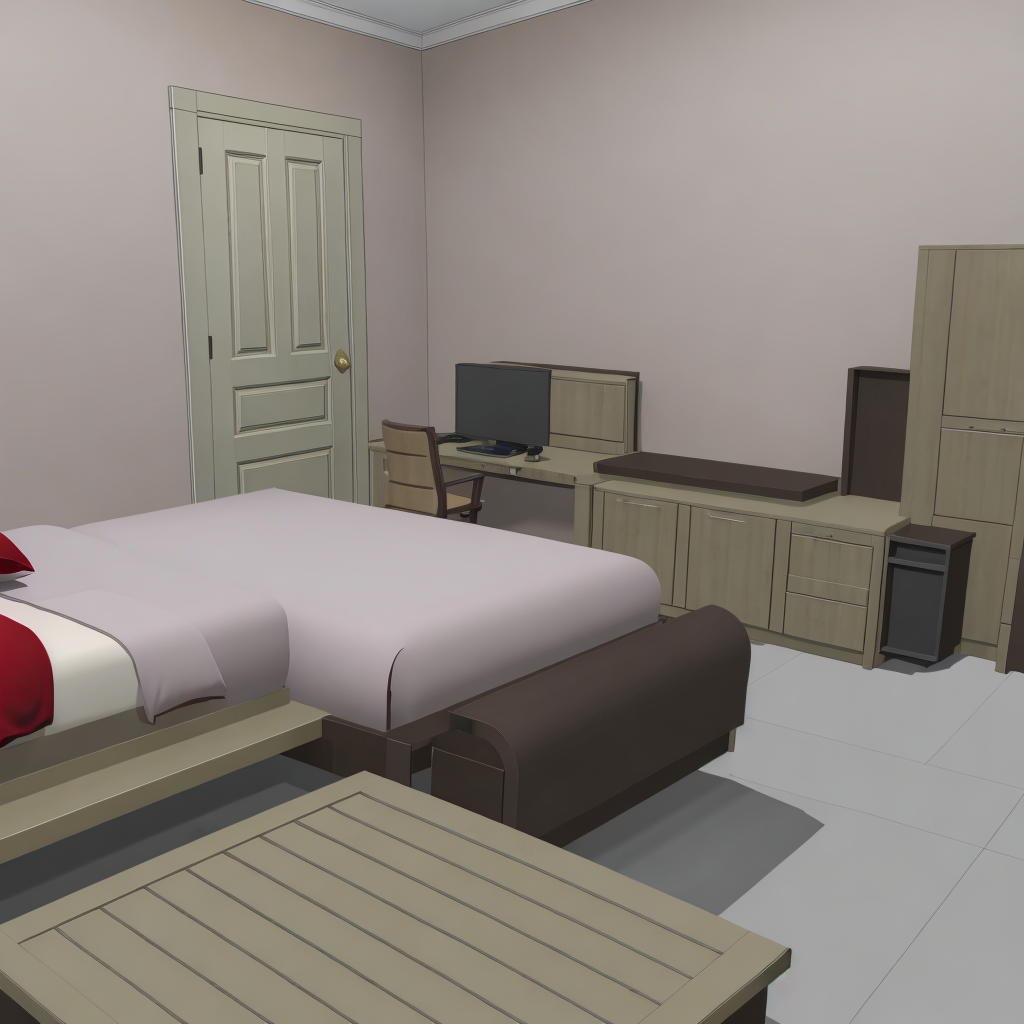

In [78]:
prompt = " A red bed, preserve the original layout"
negative_prompt = "blurry, deformed, watermark, white walls, monochrome"

strength = 0.62  # 0.3-0.8 range for fidelity to original image
guidance = 17  # higher = more prompt fidelity
num_inference_steps = 60
negative_prompt = "blurry, deformed, text, watermark, monochrome, white bed sheets, white bed, white sheets, white duvet"

for i in range(1, 4):
    image = Image.open(f"sample_{i}.png").convert("RGB")

    output = pipe(
        prompt=prompt,
        image=image,
        strength=strength,
        guidance_scale=guidance,
        num_inference_steps=num_inference_steps,
        negative_prompt=negative_prompt,

    ).images[0]
    output.save("output.png")

    display(image)
    display(output)